In [1]:
import numpy as np # linear algebra
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/16. Cross Validation Techniques/breast_cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
data = data.iloc[:, :-1]

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data.drop('id', axis = 1, inplace = True)

In [16]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

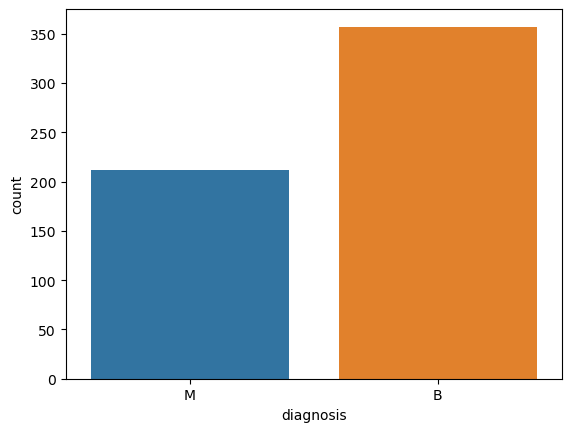

In [21]:
sns.countplot(data = data, x = 'diagnosis')

In [22]:
#identify columns ending with mean 
cols = [feature for feature in data.columns if 'mean' in feature]

In [23]:
cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [24]:
cols.append('diagnosis')

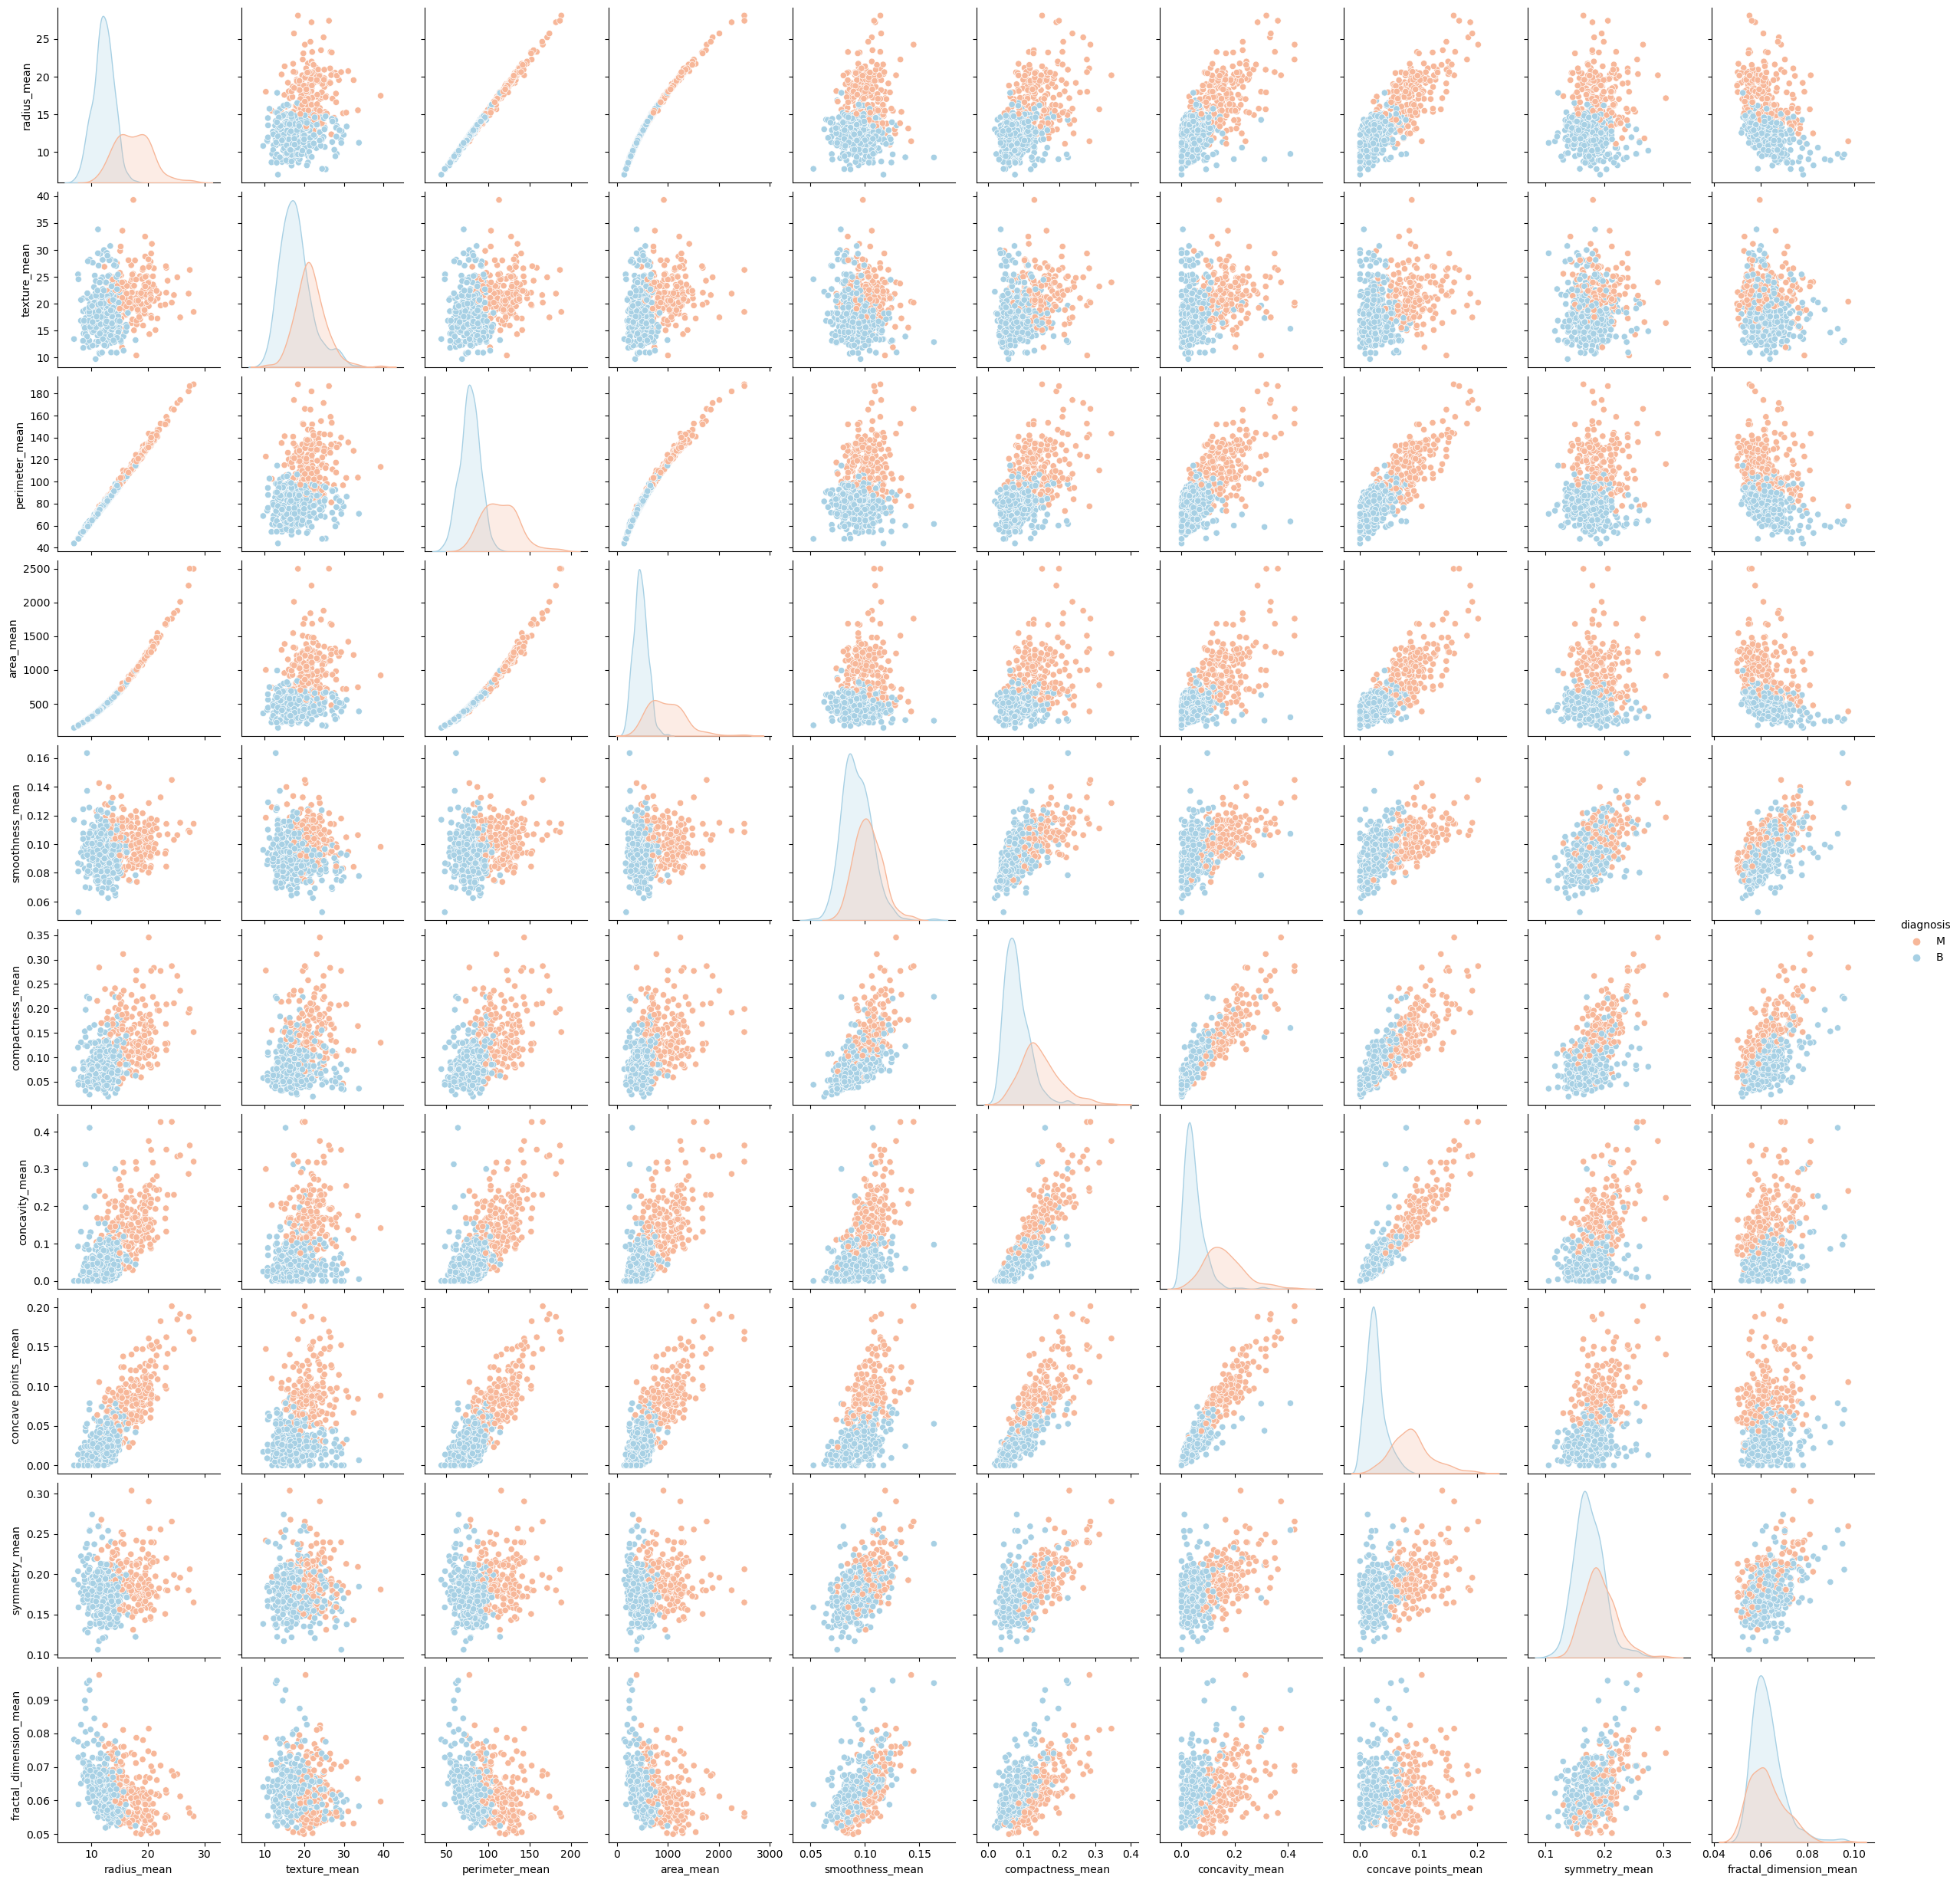

In [25]:
#Visualise pairplot
sns.pairplot(data[cols], hue = 'diagnosis', palette = 'RdBu')

/var/folders/f2/3yqhtt0101z78fp8m6_yxqq40000gp/T/ipykernel_8342/168630946.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[cols].corr(), annot = True)


<Axes: >

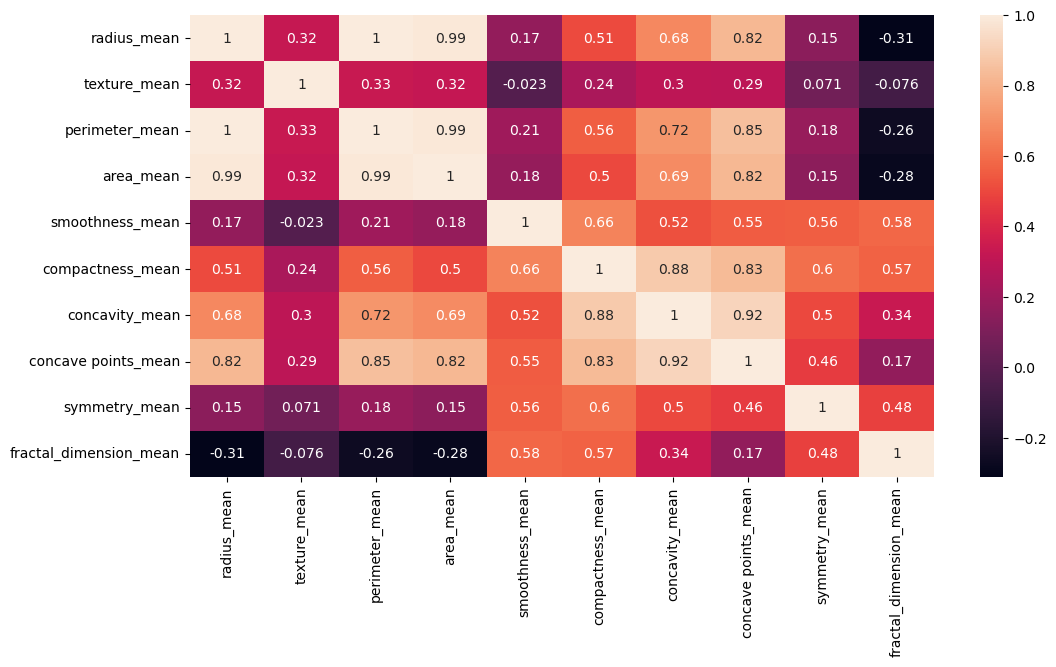

In [26]:
#Look for collinearity
plt.figure(figsize=(12, 6))
sns.heatmap(data[cols].corr(), annot = True)

In [27]:
# first, drop all "worst" columns
cols1 = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
data.drop(cols1, axis=1, inplace = True)

In [28]:
# then, drop all columns related to the "perimeter" and "area" attributes
cols2 = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
data.drop(cols2, axis=1, inplace = True)

In [29]:
# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols3 = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
data.drop(cols3, axis=1, inplace = True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 57.9+ KB


In [31]:
#Split data into x and y    
x = data.iloc[:, 1:]
y = data.iloc[:, 0].values

y = y.reshape(-1, 1)

In [32]:
#######  HOLDOUT VALIDATION APPROACH   #######
#We usually do a train and test split under this type of CV

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
result = model.score(x_test, y_test)

print(result)

0.8771929824561403


In [37]:
##################    K-FOLD CROSS VALIDATION    #################
from sklearn.model_selection import KFold
model = DecisionTreeClassifier()
kfold_valn = KFold(10) # 10 diff randomness to have 10 diff accuracy

from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv = kfold_valn)

print(results)
print(np.mean(results))

[0.8245614  0.96491228 0.8245614  0.8245614  0.9122807  0.98245614
 0.9122807  0.94736842 0.9122807  0.875     ]
0.8980263157894737


In [38]:
############   STRATIFIED K-FOLD CROSS VALIDATION    #############
#Helps when the data is imbalanced, lets say we have 100 yes and 10 no, it puts 10 yes with 1 no to have a balanced approach else the test dataset won't learn

from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5)
model = DecisionTreeClassifier()

scores = cross_val_score(model, x, y, cv = skfold)
print(np.mean(scores))

0.8944729079335506


In [39]:
###########  LEAVE ONE OUT CROSS VALIDATION (LOOCV)   ############

from sklearn.model_selection import LeaveOneOut
model = DecisionTreeClassifier()
leave_valn = LeaveOneOut()
results = cross_val_score(model, x, y, cv = leave_valn)

print(np.mean(results))

0.9015817223198594


In [40]:
############## REPEATED RANDOM TRAIN TEST SPLITS  ################

from sklearn.model_selection import ShuffleSplit
model = DecisionTreeClassifier()

ssplit = ShuffleSplit(n_splits = 10, test_size = 0.3)
results = cross_val_score(model, x, y, cv = ssplit)

print(np.mean(results))

0.9005847953216375


In [41]:
#######################   GRIDSEARCH CV   ########################

from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy']}

gscv = GridSearchCV(estimator = model, 
                    param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 10)

gscv = gscv.fit(x_train, y_train)

accuracy = gscv.best_score_
print(accuracy)

0.9210144927536232


In [42]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [43]:
gscv.best_params_

{'criterion': 'entropy'}